In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

#plt.style.use('dark_background')

%matplotlib widget

In [2]:
data = np.load('/home/danielk/git/antisat_analysis/projects/output/russian_asat/2021.11.23_uhf_rcs/discos_object_sizes.npz')

In [3]:
for key in data:
    x = data[key]
    print(f'{key} = {np.sum(np.isnan(x))}/{len(x)} number of nans')

measurnment_id = 0/30 number of nans
oid = 0/30 number of nans
min_area = 7/30 number of nans
avg_area = 7/30 number of nans
max_area = 7/30 number of nans
diam = 24/30 number of nans


(array([4., 0., 3., 0., 0., 2., 0., 5., 4., 5.]),
 array([-1.80761295, -1.51094528, -1.21427761, -0.91760993, -0.62094226,
        -0.32427458, -0.02760691,  0.26906076,  0.56572844,  0.86239611,
         1.15906378]),
 <BarContainer object of 10 artists>)

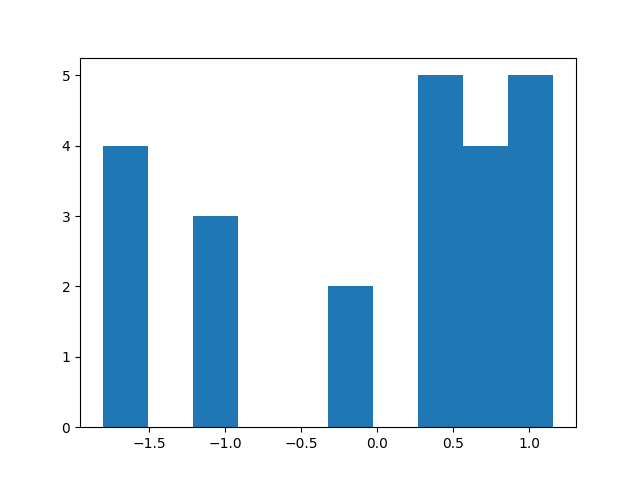

In [4]:
plt.hist(np.log10(data['avg_area']))

In [ ]:
for oid, A, minA, maxA, d in zip(data['oid'], data['avg_area'], data['min_area'], data['max_area'], data['diam']):
    print(f'OID-{int(oid)}: avg. A = {A} [{minA},{maxA}], d={d}')

In [ ]:
plt.errorbar(
    np.arange(len(data['oid'])),
    data['avg_area'],
    np.vstack([
        data['avg_area'] - data['min_area'],
        data['max_area'] - data['avg_area'],
    ]),
)

In [ ]:
file = '/home/danielk/git/antisat_analysis/projects/output/russian_asat/2021.11.23_uhf_rcs/uhf_20211123_124927_000000/uhf_20211123_124927_000000_results.pickle'
with open(file, 'rb') as fh:
    res = pickle.load(fh)

In [ ]:
plt.hist(res['best_matches'])

In [ ]:
plt.hist(res['best_matches'][res['best_matches'] > 0.9])

In [ ]:
plt.hist(res['best_matches'][res['best_matches'] > 0.95])

In [ ]:
match_limit = np.percentile(res['best_matches'], 100 - 0.3)
print(match_limit)
inds = res['best_matches'] > match_limit
not_inds = np.logical_not(inds)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.log10(res['best_diams'][inds]), res['best_matches'][inds], '.r')
ax.plot(np.log10(res['best_diams'][not_inds]), res['best_matches'][not_inds], '.b')
ax.set_ylim([0.8,1])

In [ ]:
from scipy.stats import norm
x = np.linspace(-2, 2, 2000)
y = np.zeros_like(x)
for j in np.argwhere(inds).flatten():
    y += norm.pdf(x, loc=np.log10(res['best_diams'][j]), scale=0.05)
y_ = norm.pdf(x, loc=0, scale=0.1)
y[y > y_.max()*0.5] = y_.max()*0.5
y[x < np.min(np.log10(res['best_diams'][inds]))] = 0
y[x > np.max(np.log10(res['best_diams'][inds]))] = 0
plt.plot(x, y/(y_.max()*0.5))

In [ ]:
inds = res['best_matches'] > 0.95
not_inds = np.logical_not(inds)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.log10(res['best_diams'][inds]), res['best_matches'][inds], '.r')
ax.plot(np.log10(res['best_diams'][not_inds]), res['best_matches'][not_inds], '.b')
ax.set_ylim([0.8,1])

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(res['best_matches'][res['best_matches'] > 0.95])
ax.axvline(0.98, color='r')

In [ ]:
plt.plot(res['best_matches'][res['best_matches'] > 0.95])

In [ ]:
plt.plot(np.diff(res['best_matches'][res['best_matches'] > 0.95]))

In [ ]:
diams = res['best_diams'][res['best_matches'] > 0.98]

In [ ]:
diams

In [ ]:
print(np.mean(diams), np.std(diams))


In [ ]:
len(diams) / len(res['best_diams'])

In [ ]:
sum_file = '/home/danielk/git/antisat_analysis/projects/output/russian_asat/2021.11.23_uhf_rcs/collected_results.pickle'
with open(sum_file, 'rb') as fh:
    summary_data = pickle.load(fh)

In [ ]:
df = pd.DataFrame(summary_data)

In [ ]:
df

In [ ]:
plt.hist(df['estimated_offset_angle'])

In [ ]:
def log_hist(x):
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),int(np.sqrt(len(x))))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

In [ ]:
log_hist(df['estimated_diam']*1e2)
#plt.hist(np.log10(df['estimated_diam']*1e2))

In [ ]:
log_hist(df['predicted_diam']*1e2)
#plt.hist(np.log10(df['predicted_diam']*1e2))

In [ ]:
df['predicted_offset_angle'].values[np.logical_not(np.isnan(df['predicted_offset_angle']))]

In [ ]:
log_hist(df['predicted_offset_angle'])

In [ ]:
log_hist(df['estimated_offset_angle'])

In [ ]:
log_hist(np.abs(df['estimated_diam'] - df['predicted_diam'])*1e2)
#plt.hist((df['estimated_diam'] - df['predicted_diam'])*1e2)

In [ ]:
discos_d_diff = df['estimated_diam'] - df['discos_avg_diam']
discos_est_inds = np.argwhere(np.logical_not(np.isnan(discos_d_diff.values))).flatten()
for ind in discos_est_inds:
    print(f'\nIND={ind}')
    print('Discos:')
    print(
        df['discos_min_diam'].values[ind]*1e2,
        df['discos_avg_diam'].values[ind]*1e2,
        df['discos_max_diam'].values[ind]*1e2,
    )
    print('Predicted:')
    print(
        df['predicted_diam'].values[ind]*1e2,
    )
    print('Estimated:')
    print(
        df['estimated_min_diam'].values[ind]*1e2,
        df['estimated_diam'].values[ind]*1e2,
        df['estimated_max_diam'].values[ind]*1e2,
    )